In [ ]:
import pyspark as ps
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
import boto3
import configparser
from io import BytesIO
import pandas as pd
import io
import csv
import matplotlib as plt 
from pyspark.sql.functions import *
sqlContext = SQLContext(spark)

In [4]:
#I would probably try to make a lambda function to unzip these files in the future, if we were streaming
#this data more often, part of a regular pipeline.
#You could trigger the lambda at the cadenece of your choosing and push it back to your s3, or you could use 
#Amazon kinesis to stream elsewhere. 

In [5]:
def create_spark_session():
    """
    Creating a spark session.
    """
    spark = SparkSession \
        .builder \
        .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:2.7.0") \
        .getOrCreate()
    return spark

create_spark_session()

In [43]:
df_one_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-01.csv",format="csv", sep="\t", inferSchema="true", header="false")

In [59]:
df_two_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-02.tsv",format="csv", sep="\t", inferSchema="true", header="false")

In [60]:
df_three_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-03.tsv",format="csv", sep="\t", inferSchema="true", header="false")

In [61]:
df_four_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-04.tsv",format="csv", sep="\t", inferSchema="true", header="false")

In [115]:
df_five_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-05.tsv",format="csv", sep="\t", inferSchema="true", header="false")

In [117]:
df_six_ = spark.read.load("/Users/milesklingenberg/Downloads/clickstream-enwiki-2020-06.tsv",format="csv", sep="\t", inferSchema="true", header="false")

In [ ]:
#Again would not import it this way typically, this problem would really depend on what or how the data is
#being gathered. It could be the case we only want to push the new records from one of these streaming sources when new 
#records are initiated. Or, it could be the case that these are already parralelized servers gathering the info. 

#Have outputs below

In [66]:
df_one_.show(2)

+------------+------------------+--------+---+
|         _c0|               _c1|     _c2|_c3|
+------------+------------------+--------+---+
|Eddie_Albert|The_Dude_Goes_West|    link| 17|
| other-empty|The_Dude_Goes_West|external|112|
+------------+------------------+--------+---+
only showing top 2 rows



In [68]:
df_two_.show(2)

+--------------------+-----+----+---+
|                 _c0|  _c1| _c2|_c3|
+--------------------+-----+----+---+
|List_of_Mexican_d...|Pozol|link| 27|
|    Tuxtla_Gutiérrez|Pozol|link| 14|
+--------------------+-----+----+---+
only showing top 2 rows



In [70]:
df_three_.show(2)

+------------+-----------------+--------+---+
|         _c0|              _c1|     _c2|_c3|
+------------+-----------------+--------+---+
| other-empty|       Kamasḥalta|external| 11|
|other-search|Melanie_Windridge|external| 64|
+------------+-----------------+--------+---+
only showing top 2 rows



In [72]:
df_four_.show(2)

+--------------------+--------------------+--------+---+
|                 _c0|                 _c1|     _c2|_c3|
+--------------------+--------------------+--------+---+
|         other-empty|Die_ganze_Welt_br...|external| 20|
|Eurovision_Song_C...|Die_ganze_Welt_br...|    link| 11|
+--------------------+--------------------+--------+---+
only showing top 2 rows



In [ ]:
##Looks as though all of the data is the same formt. 
#four columns 
#varchar (search), 
#varchar movie/song title?, 
#char (type of path), 
#int (not sure)

In [62]:
print((df_one_.count(), len(df_one_.columns)))

(33034556, 4)


In [63]:
print((df_two_.count(), len(df_two_.columns)))

(31024605, 4)


In [64]:
print((df_three_.count(), len(df_three_.columns)))

(31298889, 4)


In [65]:
print((df_four_.count(), len(df_four_.columns)))

(34783768, 4)


In [ ]:
##We can look at the unique values of each. 

In [75]:
df_one_.agg(countDistinct(col("_c0")).alias("count")).show()

+-------+
|  count|
+-------+
|2003269|
+-------+



In [ ]:
#about two million unique values, probably similar in the other datasets as well. 

In [111]:
df_one_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|           Main_Page|131006|
|        Hyphen-minus|128096|
|       United_States|  7749|
|               India|  4024|
|      United_Kingdom|  3720|
|             YouTube|  3104|
|        World_War_II|  3078|
|       New_York_City|  2762|
|               China|  2575|
|                IMDb|  2409|
|      Academy_Awards|  2330|
|         Los_Angeles|  2318|
|     Catholic_Church|  2254|
|Order_of_the_Brit...|  2250|
|           Australia|  2163|
|                Iran|  2161|
|          California|  2150|
|              Canada|  2136|
|         Kobe_Bryant|  2081|
|             Germany|  2070|
|        Soviet_Union|  1961|
|         World_War_I|  1960|
|              Russia|  1958|
|        Donald_Trump|  1947|
|     Rotten_Tomatoes|  1900|
|              France|  1853|
|               Japan|  1822|
|             Netflix|  1756|
|      Ottoman_Empire|  1712|
|        Elizabeth_II|  1698|
|         

In [ ]:
# I am assuming that when you ask for the top 50 by results you mean the title of column 2. 

In [112]:
df_two_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)
#Will go through the rest of these as this is what the assignment calls for. 

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|           Main_Page|119322|
|        Hyphen-minus|118387|
|       United_States|  7231|
|      United_Kingdom|  3592|
|               India|  3551|
|        World_War_II|  2973|
|             YouTube|  2705|
|       New_York_City|  2645|
|      Academy_Awards|  2421|
|               China|  2302|
|         Los_Angeles|  2083|
|Order_of_the_Brit...|  2054|
|     Catholic_Church|  2013|
|          California|  1994|
|             Germany|  1973|
|                IMDb|  1957|
|        Donald_Trump|  1900|
|              Canada|  1839|
|           Australia|  1814|
|        Soviet_Union|  1806|
|              Russia|  1786|
|         World_War_I|  1750|
|Democratic_Party_...|  1742|
|              France|  1711|
|               Japan|  1671|
|             Netflix|  1641|
|Republican_Party_...|  1575|
|     Rotten_Tomatoes|  1569|
|      Ottoman_Empire|  1547|
|              London|  1528|
|         

In [ ]:
#results are pretty similar, at this point I am wondering if we want to combine these datasets but the assignment 
#call for each to be summarize 

In [113]:
df_three_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|        Hyphen-minus|123570|
|           Main_Page|121766|
|       United_States|  7475|
|2019–20_coronavir...|  5876|
|               India|  3726|
|      United_Kingdom|  3505|
|        World_War_II|  2999|
|             YouTube|  2960|
|Coronavirus_disea...|  2914|
|       New_York_City|  2910|
|               China|  2646|
|                IMDb|  2298|
|         Los_Angeles|  2263|
|     Catholic_Church|  2183|
|          California|  2129|
|      Academy_Awards|  2099|
|             Germany|  2068|
|Order_of_the_Brit...|  2021|
|              Canada|  1927|
|        Donald_Trump|  1921|
|        Soviet_Union|  1916|
|              Russia|  1895|
|               Italy|  1871|
|           Australia|  1867|
|     Rotten_Tomatoes|  1802|
|         World_War_I|  1782|
|              France|  1761|
|             Netflix|  1748|
|Democratic_Party_...|  1718|
|               Japan|  1708|
|Republica

In [114]:
df_four_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|        Hyphen-minus|144380|
|           Main_Page|131329|
|       United_States|  8416|
|               India|  4388|
|   COVID-19_pandemic|  4014|
|      United_Kingdom|  3961|
|             YouTube|  3538|
|        World_War_II|  3514|
|       New_York_City|  3489|
|                IMDb|  3460|
|               China|  2825|
|         Los_Angeles|  2732|
|     Catholic_Church|  2608|
|     Rotten_Tomatoes|  2533|
|      Academy_Awards|  2371|
|          California|  2370|
|Order_of_the_Brit...|  2355|
|        Soviet_Union|  2298|
|             Germany|  2285|
|              Canada|  2223|
|           Australia|  2212|
|             Netflix|  2180|
|              Russia|  2129|
|        Donald_Trump|  2120|
|Coronavirus_disea...|  2091|
|         World_War_I|  2066|
|              France|  1998|
|               Japan|  1994|
|              London|  1866|
|        South_Africa|  1859|
|      Ott

In [116]:
df_five_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|        Hyphen-minus|144748|
|           Main_Page|131260|
|       United_States|  8197|
|   COVID-19_pandemic|  4352|
|               India|  4288|
|      United_Kingdom|  3909|
|        World_War_II|  3570|
|             YouTube|  3481|
|       New_York_City|  3280|
|                IMDb|  3140|
|               China|  2804|
|         Los_Angeles|  2693|
|     Rotten_Tomatoes|  2491|
|          California|  2431|
|     Catholic_Church|  2425|
|Order_of_the_Brit...|  2392|
|      Academy_Awards|  2374|
|        Soviet_Union|  2309|
|             Germany|  2270|
|              Canada|  2178|
|             Netflix|  2146|
|        Donald_Trump|  2114|
|           Australia|  2085|
|              Russia|  2071|
|Coronavirus_disea...|  1978|
|         World_War_I|  1974|
|               Japan|  1968|
|              France|  1945|
|      Ottoman_Empire|  1867|
|        South_Africa|  1841|
|         

In [118]:
df_six_.groupBy('_c1')\
.count()\
.sort('count', ascending = False)\
.show(50)

+--------------------+------+
|                 _c1| count|
+--------------------+------+
|        Hyphen-minus|126269|
|           Main_Page|121120|
|       United_States|  7523|
|   COVID-19_pandemic|  3880|
|               India|  3868|
|      United_Kingdom|  3496|
|             YouTube|  3094|
|        World_War_II|  2892|
|       New_York_City|  2875|
|               China|  2513|
|                IMDb|  2372|
|        Donald_Trump|  2336|
|         Los_Angeles|  2330|
|Order_of_the_Brit...|  2229|
|          California|  2161|
|      Academy_Awards|  2125|
|     Catholic_Church|  2102|
|Democratic_Party_...|  2087|
|             Germany|  2013|
|        Soviet_Union|  1963|
|     Rotten_Tomatoes|  1950|
|Republican_Party_...|  1934|
|             Netflix|  1920|
|              Canada|  1889|
|              Russia|  1857|
|           Australia|  1825|
|  American_Civil_War|  1792|
|               Japan|  1768|
|        Barack_Obama|  1731|
|              France|  1716|
|        S

In [140]:
import matplotlib.pyplot as plt

df_six_example = df_six_.groupBy('_c1')\
.count() \
.sort('count', ascending = False)\
.limit(50)

df_six_example_pandas = df_six_example.toPandas()

df_six_example_pandas
#This is if you wanted to bring it to pandas, make it a little prettier to look at. I won't do this for every data
#frame but this is how you would do this. 

,_c1,count
0,Hyphen-minus,126269
1,Main_Page,121120
2,United_States,7523
3,COVID-19_pandemic,3880
4,India,3868
5,United_Kingdom,3496
6,YouTube,3094
7,World_War_II,2892
8,New_York_City,2875
9,China,2513


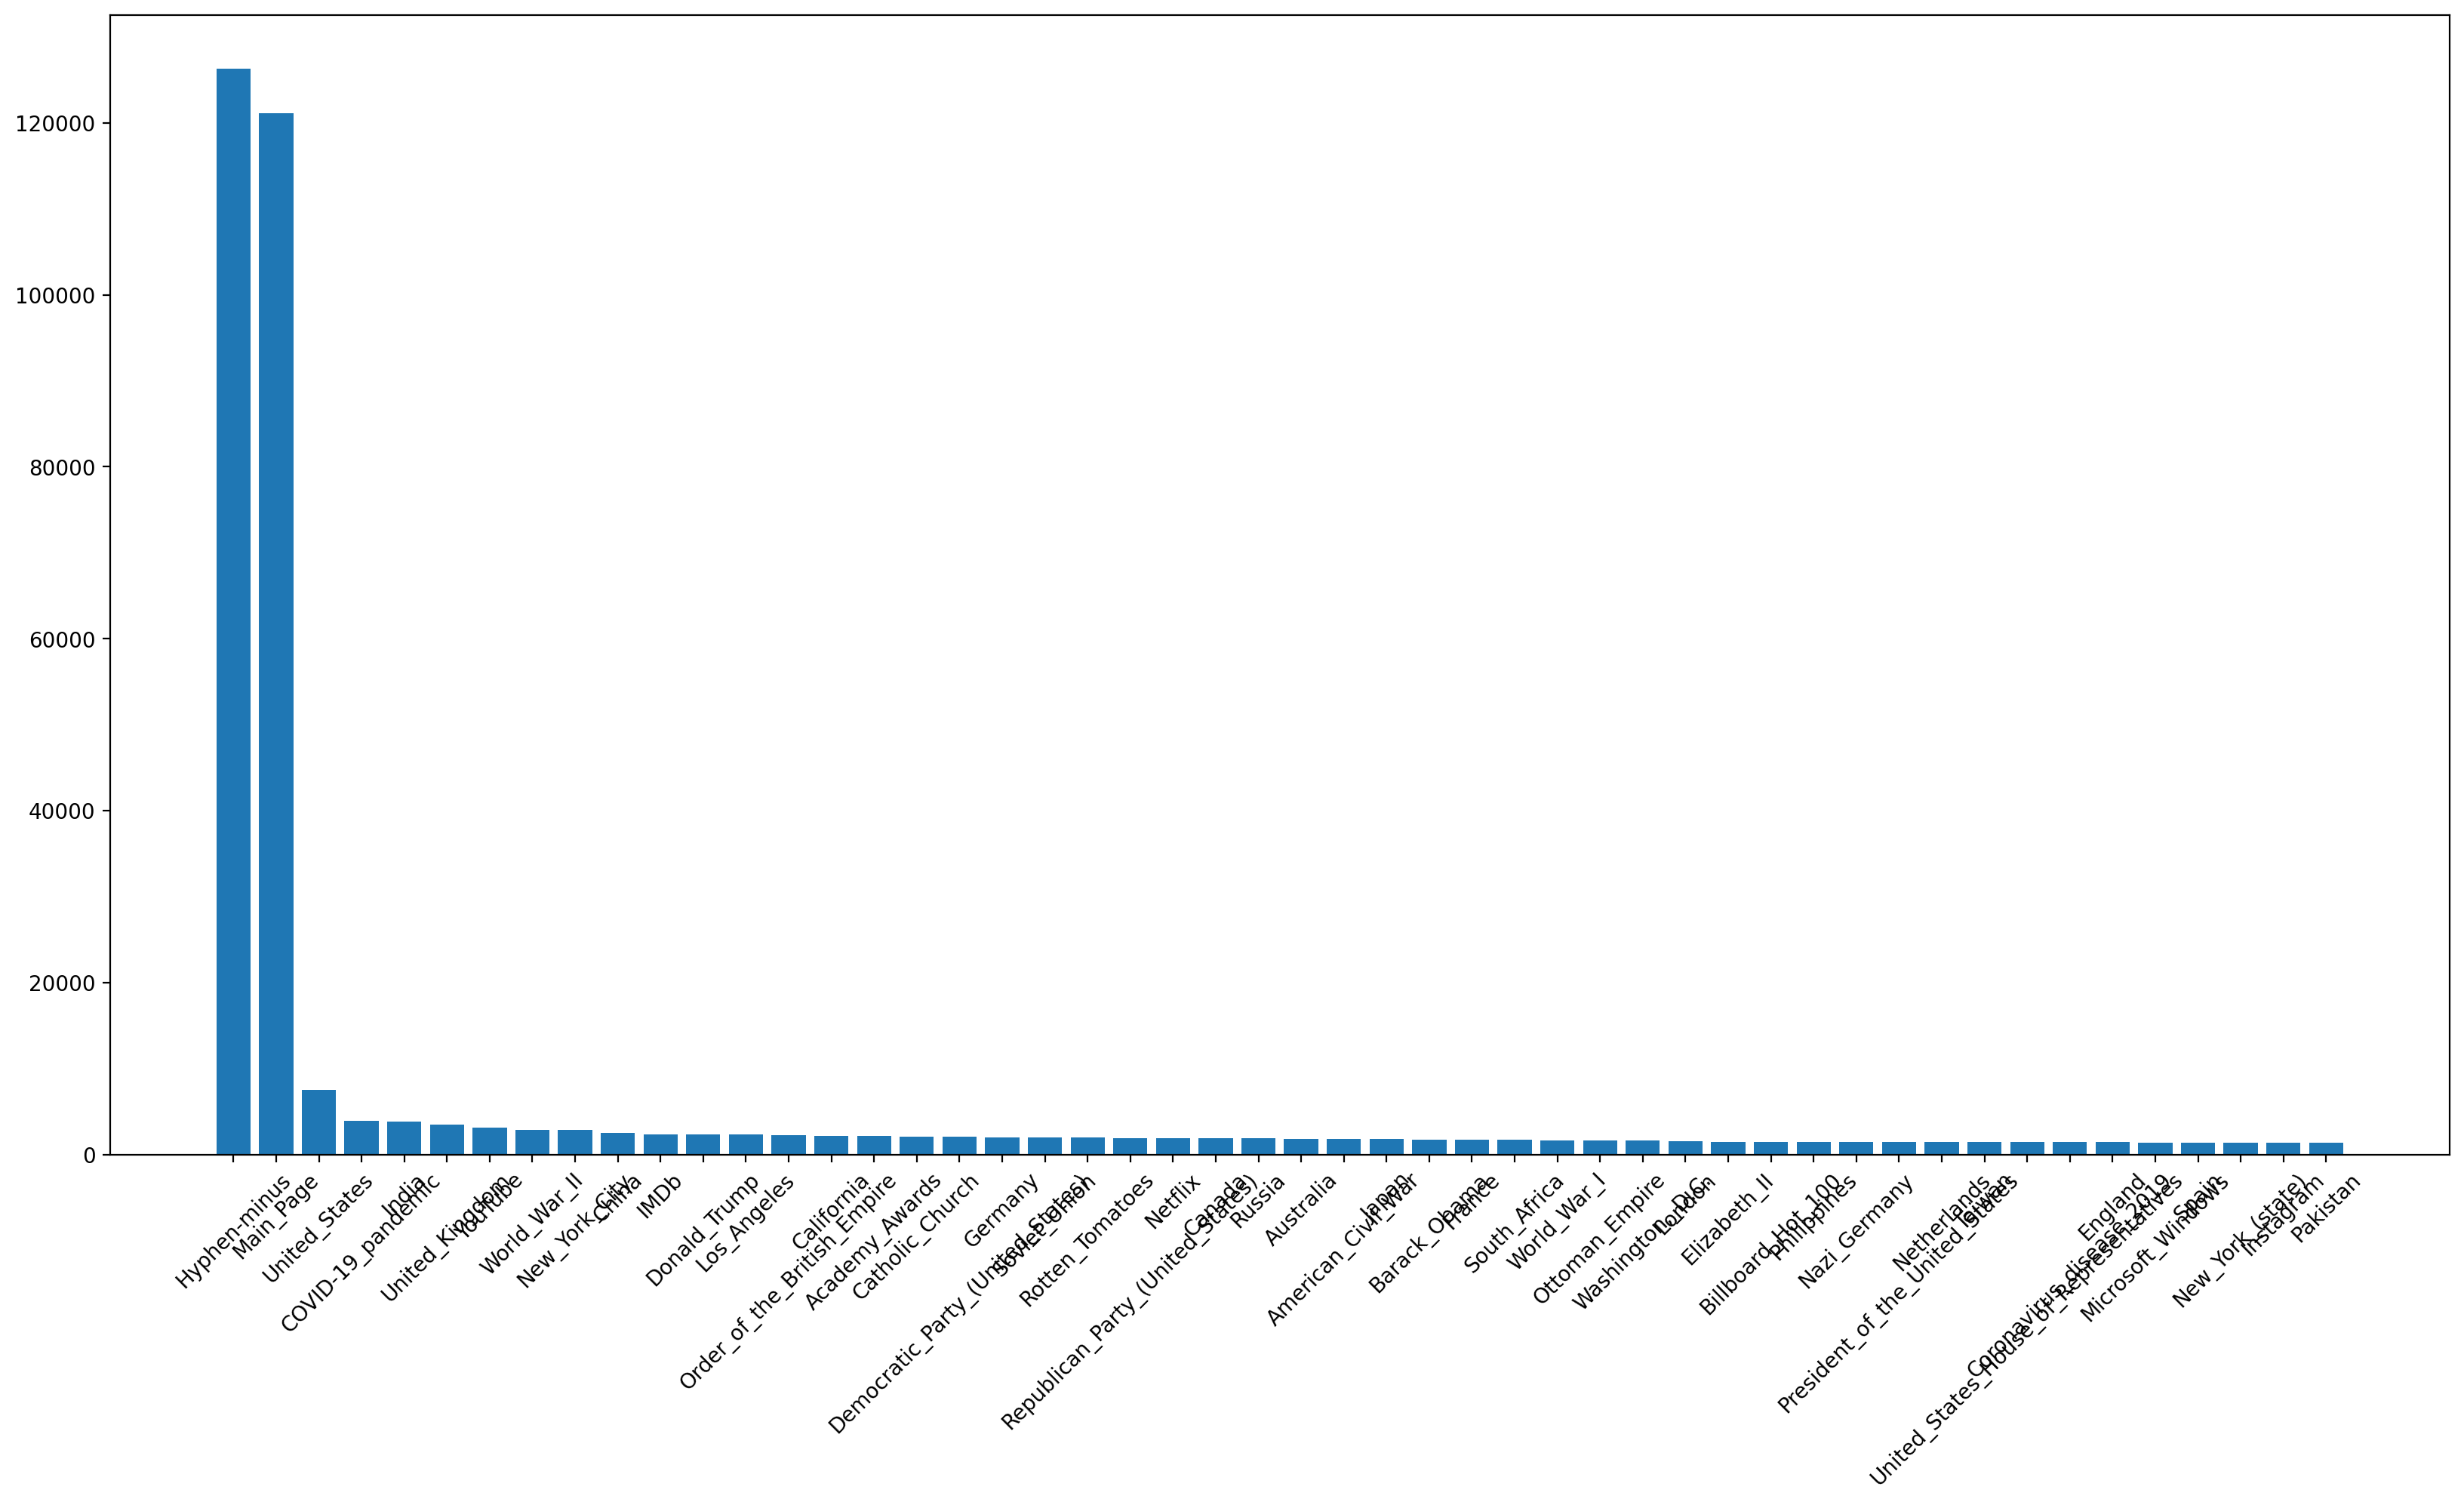

In [141]:
plt.figure(figsize=(20,10), dpi=200)
plt.bar(df_six_example_pandas['_c1'], df_six_example_pandas['count'])
plt.xticks(rotation = 45)
plt.show()